# 🚀 Proyecto Aurelion - Análisis de Ventas

Este notebook es la **fase final de Análisis** del proceso ETL del proyecto Aurelion. Asume que el **DataFrame Consolidado y Limpio** (`ventas_completo_LIMPIO.csv`) fue generado previamente por el script `Interactivo_LeerArchivo.py`.

A partir de este conjunto de datos limpio, realizaremos un **Análisis Exploratorio de Datos (EDA)** y calcularemos los **Key Performance Indicators (KPIs)** principales para la toma de decisiones.

---

## 🎯 Objetivos Clave:

1.  **Validar** la limpieza de la columna `importe`.
2.  **Calcular** los KPIs principales, incluyendo el **Ticket Promedio por Venta**.
3.  **Identificar** las **Categorías de Producto** más rentables.
4.  **Visualizar** el desempeño mediante gráficos.

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Carga de Datos 

In [3]:
# Configuración de visualización
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('whitegrid')

# --- Carga del DataFrame Consolidado y Limpio ---
# Ajusta 'RUTA_DATOS' si tu carpeta 'Aurelion' no está al mismo nivel.
RUTA_DATOS = os.path.join(os.getcwd(), 'Aurelion')
ARCHIVO_FINAL = 'ventas_completo_LIMPIO.csv' 
RUTA_COMPLETA = os.path.join(RUTA_DATOS, ARCHIVO_FINAL)

try:
    df_consolidado = pd.read_csv(RUTA_COMPLETA)
    print(f"✅ Archivo consolidado y limpio '{ARCHIVO_FINAL}' cargado correctamente.")
    print(f"Filas: {len(df_consolidado):,}, Columnas: {len(df_consolidado.columns)}")
except FileNotFoundError:
    print(f"❌ ERROR: No se encontró el archivo '{ARCHIVO_FINAL}'.")
    print("Por favor, ejecuta la Opción 4 del script 'Interactivo_LeerArchivo.py' primero.")
    df_consolidado = pd.DataFrame() # Crear un DF vacío para evitar errores si falla la carga

✅ Archivo consolidado y limpio 'ventas_completo_LIMPIO.csv' cargado correctamente.
Filas: 343, Columnas: 13


### VALIDADIÓN Y LIMPIEZA

In [5]:
if not df_consolidado.empty:
    
    # 1. Validación de Tipo de Dato: Asegurar que 'importe' sea numérico.
    df_consolidado['importe'] = pd.to_numeric(df_consolidado['importe'], errors='coerce')
    df_consolidado.dropna(subset=['importe'], inplace=True) # Elimina filas con importe nulo/no numérico
    
    # 2. Validación de Consistencia de Importe: importe debe ser (cantidad * precio_unitario).
    # Calculamos un importe de prueba
    df_consolidado['importe_calculado'] = df_consolidado['cantidad'] * df_consolidado['precio_unitario']
    
    # Verificamos si hay alguna diferencia significativa (> 0.01)
    diferencias = df_consolidado[
        (df_consolidado['importe'] - df_consolidado['importe_calculado']).abs() > 0.01 
    ]
    
    if diferencias.empty:
        print("✅ Validación de la columna 'importe' exitosa: Valores consistentes.")
    else:
        print(f"❌ Alerta: {len(diferencias)} filas tienen errores de cálculo en 'importe'.")

    # Eliminamos la columna de prueba
    df_consolidado.drop(columns=['importe_calculado'], inplace=True)
    
else:
    print("No se puede ejecutar la validación: DataFrame vacío.")

✅ Validación de la columna 'importe' exitosa: Valores consistentes.


### CÁLCULO DE KPIs PRINCIPALES

In [6]:
if not df_consolidado.empty:
    
    # 1. Ingresos y Ventas
    ingreso_total = df_consolidado['importe'].sum()
    total_ventas_unicas = df_consolidado['id_venta'].nunique() # Cantidad de tickets/órdenes
    
    # 2. KPI CLAVE: TICKET PROMEDIO POR VENTA
    ticket_promedio = ingreso_total / total_ventas_unicas
    
    # 3. Clientes
    total_clientes_activos = df_consolidado['id_cliente'].nunique()
    total_productos_vendidos = df_consolidado['cantidad'].sum()

    # Imprimir resultados
    print("\n📊 INDICADORES CLAVE:")
    print("-" * 40)
    print(f"💰 Ingreso Total Generado: ${ingreso_total:,.2f}")
    print(f"🛒 Total de Ventas (Tickets): {total_ventas_unicas:,}")
    print(f"⭐ TICKET PROMEDIO por Venta: ${ticket_promedio:,.2f}")
    print(f"👥 Total de Clientes Activos: {total_clientes_activos:,}")
    print(f"📦 Total de Productos (Unidades) Vendidos: {total_productos_vendidos:,}")
    print("-" * 40)
else:
    print("No se pueden calcular los KPIs: DataFrame vacío.")


📊 INDICADORES CLAVE:
----------------------------------------
💰 Ingreso Total Generado: $2,651,417.00
🛒 Total de Ventas (Tickets): 120
⭐ TICKET PROMEDIO por Venta: $22,095.14
👥 Total de Clientes Activos: 67
📦 Total de Productos (Unidades) Vendidos: 1,016
----------------------------------------


### CATEGORÍAS Y VISUALIZACIÓN 


🏆 Top Categorías por Ingreso:
categoria
Limpieza     $1,436,281.00
Alimentos    $1,215,136.00
Name: importe, dtype: object


C:\Users\Luna\AppData\Local\Temp\ipykernel_10948\2577654422.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


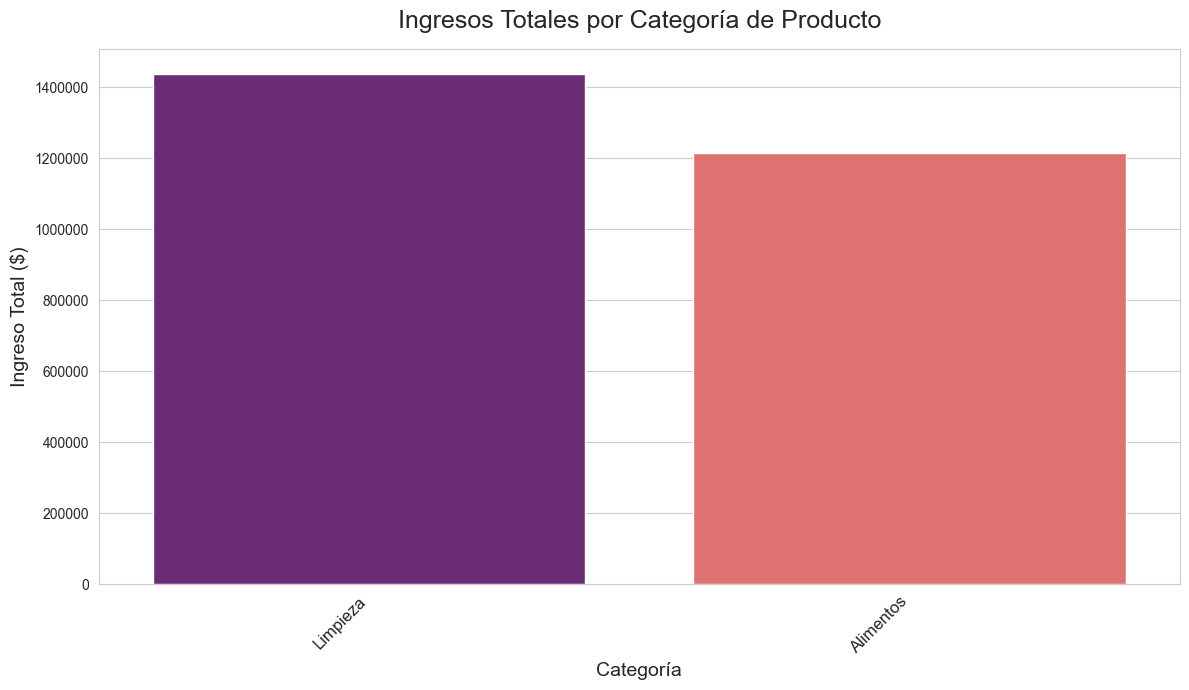

In [7]:
if not df_consolidado.empty:
    
    # 1. Agrupación por Categoría e Ingreso Total
    ventas_por_categoria = df_consolidado.groupby('categoria')['importe'].sum().sort_values(ascending=False)
    
    print("\n🏆 Top Categorías por Ingreso:")
    print(ventas_por_categoria.head(5).apply(lambda x: f"${x:,.2f}"))
    
    # 2. Visualización
    plt.figure(figsize=(12, 7))
    sns.barplot(
        x=ventas_por_categoria.index, 
        y=ventas_por_categoria.values, 
        palette='magma' # Un color más llamativo
    )
    plt.title('Ingresos Totales por Categoría de Producto', fontsize=18, pad=15)
    plt.xlabel('Categoría', fontsize=14)
    plt.ylabel('Ingreso Total ($)', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ticklabel_format(style='plain', axis='y') # Evita notación científica en Y
    plt.tight_layout()
    plt.show()
else:
    print("No se puede generar la visualización: DataFrame vacío.")

C:\Users\Luna\AppData\Local\Temp\ipykernel_10948\1487526431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


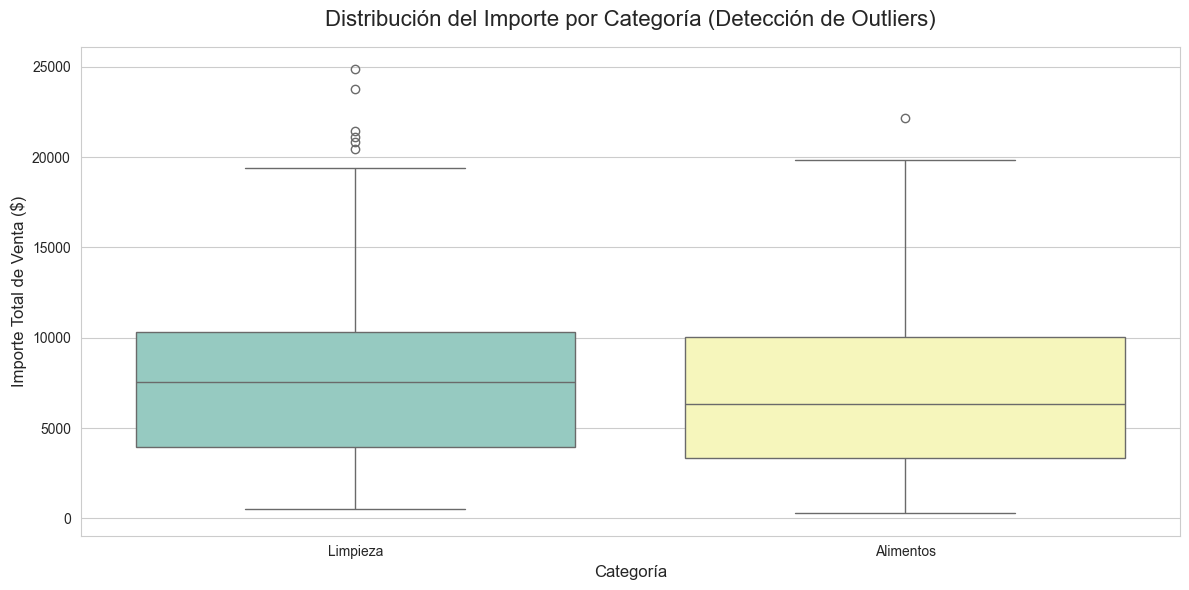

In [8]:
if not df_consolidado.empty:
    
    # Boxplot para analizar la distribución del importe por categoría
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        x='categoria', 
        y='importe', 
        data=df_consolidado, 
        palette='Set3',
        showfliers=True # Muestra los outliers (puntos fuera de los bigotes)
    )
    
    plt.title('Distribución del Importe por Categoría (Detección de Outliers)', fontsize=16, pad=15)
    plt.xlabel('Categoría', fontsize=12)
    plt.ylabel('Importe Total de Venta ($)', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

### 🔎 Observación del Gráfico de Distribución (Boxplot)

Este gráfico es fundamental para el **Objetivo 1 (Validar Limpieza)**, ya que muestra cómo se distribuye el valor de las ventas individuales (`importe`) dentro de cada `categoría`.

* **Rango de Valores:** La caja central indica el rango donde se concentra el 50% de las transacciones. Nos permite ver rápidamente qué categoría tiene las ventas más consistentemente altas o bajas.
* **Outliers (Puntos Aislados):** Los puntos que se extienden fuera de los "bigotes" del gráfico son **transacciones atípicas**. Representan ventas con importes excepcionalmente altos o bajos.
    * **Implicación de Outliers:** Estos pueden ser compras muy grandes y legítimas, o bien, **errores en el registro** de datos.
    * **Acción Requerida:** Se recomienda revisar los registros específicos de estas transacciones para confirmar su validez. Si son errores, deberían ser tratados en la fase ETL (`Limpiar_Datos.py`) para evitar que sesguen cálculos sensibles a promedios.

---


🏆 Top 5 categorías por ingreso total:

categoria
Limpieza     $1,436,281.00
Alimentos    $1,215,136.00
Name: importe, dtype: object


C:\Users\Luna\AppData\Local\Temp\ipykernel_10948\681419309.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Luna\AppData\Local\Temp\ipykernel_10948\681419309.py:31: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Luna\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


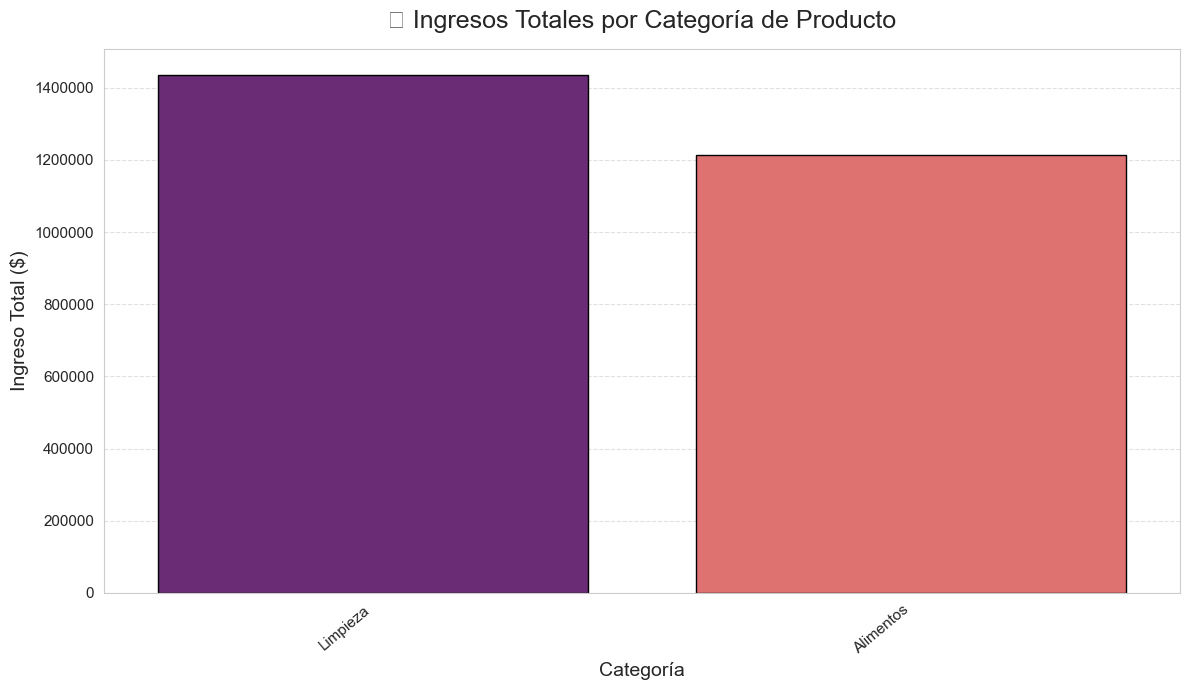

In [9]:
if not df_consolidado.empty:
    
    # 1️⃣ Agrupación por categoría e ingreso total
    ventas_por_categoria = (
        df_consolidado.groupby('categoria')['importe']
        .sum()
        .sort_values(ascending=False)
    )
    
    # 2️⃣ Mostrar resumen en consola
    print("\n🏆 Top 5 categorías por ingreso total:\n")
    print(ventas_por_categoria.head(5).apply(lambda x: f"${x:,.2f}"))
    
    # 3️⃣ Visualización con estilo
    plt.figure(figsize=(12, 7))
    sns.barplot(
        data=ventas_por_categoria.reset_index(),
        x='categoria',
        y='importe',
        palette='magma',
        edgecolor='black'
    )

    plt.title('💰 Ingresos Totales por Categoría de Producto', fontsize=18, pad=15)
    plt.xlabel('Categoría', fontsize=14)
    plt.ylabel('Ingreso Total ($)', fontsize=14)
    plt.xticks(rotation=40, ha='right', fontsize=11)
    plt.yticks(fontsize=11)
    plt.ticklabel_format(style='plain', axis='y')  # Evita notación científica en eje Y
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No se puede generar la visualización: el DataFrame está vacío.")


### ANÁLISIS GEOGRÁFICO POR CIUDAD


🏙️ Ingresos Totales por Ciudad:
ciudad
Rio Cuarto     $792,203.00
Alta Gracia    $481,504.00
Cordoba        $481,482.00
Carlos Paz     $353,852.00
Villa Maria    $313,350.00
Name: importe, dtype: object


C:\Users\Luna\AppData\Local\Temp\ipykernel_10948\500626665.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


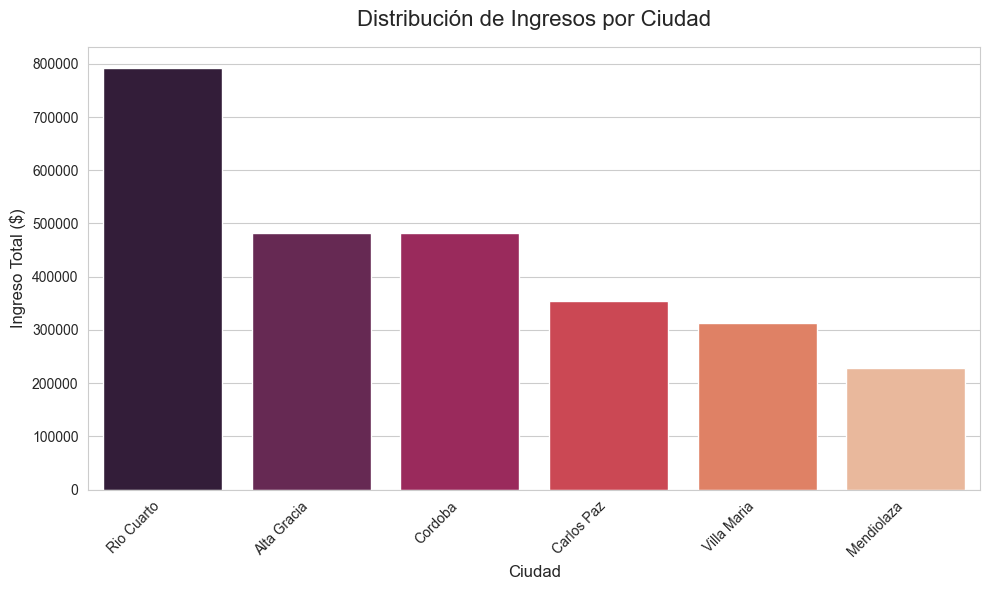

In [10]:
if not df_consolidado.empty:
    
    # Agrupación por Ciudad y cálculo del Ingreso Total
    ventas_por_ciudad = df_consolidado.groupby('ciudad')['importe'].sum().sort_values(ascending=False)
    
    print("\n🏙️ Ingresos Totales por Ciudad:")
    print(ventas_por_ciudad.head().apply(lambda x: f"${x:,.2f}"))
    
    # Visualización (Gráfico de barras)
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=ventas_por_ciudad.index, 
        y=ventas_por_ciudad.values, 
        palette='rocket'
    )
    plt.title('Distribución de Ingresos por Ciudad', fontsize=16, pad=15)
    plt.xlabel('Ciudad', fontsize=12)
    plt.ylabel('Ingreso Total ($)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ticklabel_format(style='plain', axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("No se puede generar la visualización por Ciudad: DataFrame vacío.")

### ANÁLISIS DE COMPORTAMIENTO POR MEDIO DE PAGO


💳 Distribución de Ventas (Tickets) por Medio de Pago:
medio_pago
efectivo         37
qr               30
tarjeta          26
transferencia    27
Name: id_venta, dtype: int64


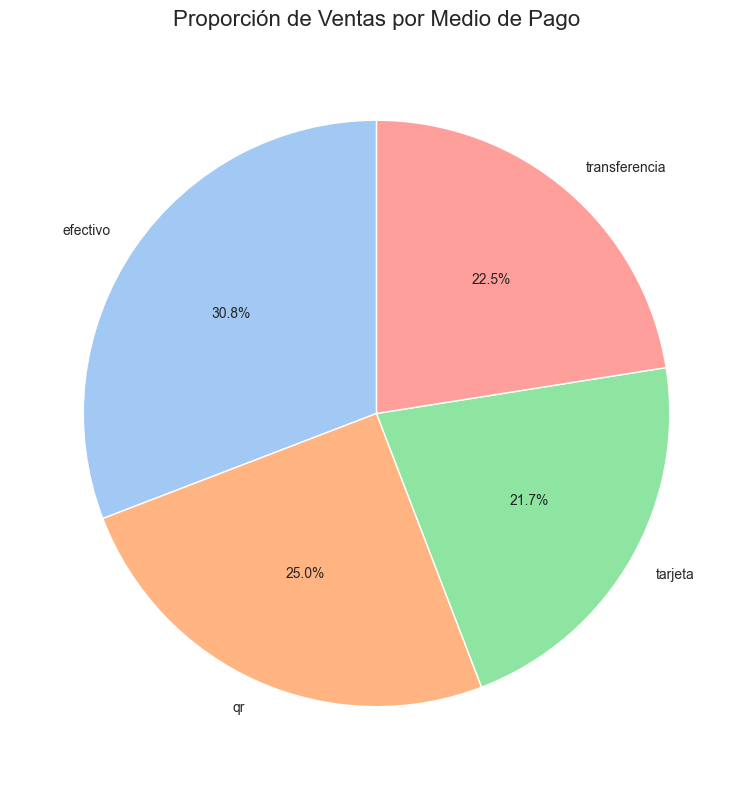

In [11]:
if not df_consolidado.empty:
    
    # Conteo de Ventas Únicas por Medio de Pago (ya que un ticket puede tener varios productos)
    # Agrupamos por id_venta y medio_pago, y luego contamos las ventas únicas por medio de pago.
    ventas_unicas_por_pago = df_consolidado.drop_duplicates(subset=['id_venta']).groupby('medio_pago')['id_venta'].count()
    
    # Calcular porcentajes
    porcentajes = ventas_unicas_por_pago / ventas_unicas_por_pago.sum()
    
    print("\n💳 Distribución de Ventas (Tickets) por Medio de Pago:")
    print(ventas_unicas_por_pago)

    # Visualización (Gráfico de pastel)
    plt.figure(figsize=(8, 8))
    plt.pie(
        ventas_unicas_por_pago, 
        labels=ventas_unicas_por_pago.index, 
        autopct='%1.1f%%',  # Muestra el porcentaje
        startangle=90, 
        colors=sns.color_palette('pastel')
    )
    plt.title('Proporción de Ventas por Medio de Pago', fontsize=16, pad=15)
    plt.ylabel('') # Ocultar la etiqueta del eje y (innecesaria en gráficos de pastel)
    plt.tight_layout()
    plt.show()
else:
    print("No se puede generar la visualización por Medio de Pago: DataFrame vacío.")

### EVOLUCIÓN DE VENTAS A LO LARGO DEL TIEMPO

C:\Users\Luna\AppData\Local\Temp\ipykernel_10948\2510543658.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df_consolidado.set_index('fecha').resample('M')['importe'].sum()



⏳ Ventas Totales por Mes:
fecha
2024-01    $529,840.00
2024-02    $407,041.00
2024-03    $388,263.00
2024-04    $251,524.00
2024-05    $561,832.00
2024-06    $512,917.00
Name: importe, dtype: object


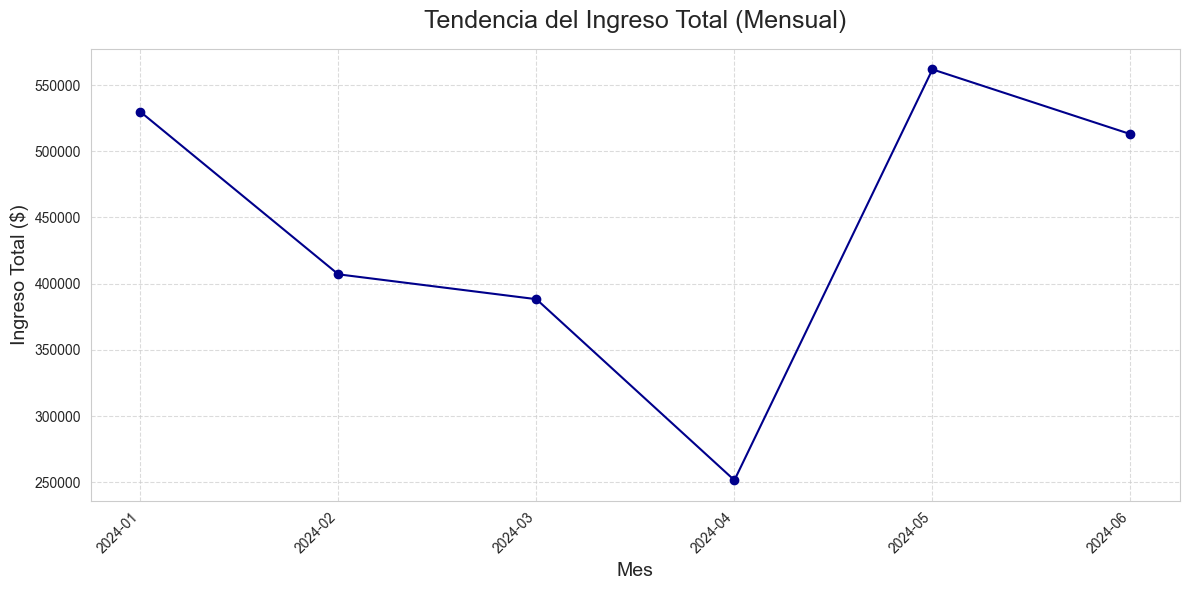

In [12]:
if not df_consolidado.empty:
    
    # 1. Asegurar que la columna 'fecha' sea tipo datetime
    df_consolidado['fecha'] = pd.to_datetime(df_consolidado['fecha'], errors='coerce')
    
    # 2. Agrupar el importe por mes
    ventas_mensuales = df_consolidado.set_index('fecha').resample('M')['importe'].sum()
    
    # 3. Crear una etiqueta de mes/año para el gráfico
    ventas_mensuales.index = ventas_mensuales.index.strftime('%Y-%m')
    
    print("\n⏳ Ventas Totales por Mes:")
    print(ventas_mensuales.apply(lambda x: f"${x:,.2f}"))

    # Visualización (Gráfico de línea)
    plt.figure(figsize=(12, 6))
    ventas_mensuales.plot(kind='line', marker='o', color='darkblue')
    
    plt.title('Tendencia del Ingreso Total (Mensual)', fontsize=18, pad=15)
    plt.xlabel('Mes', fontsize=14)
    plt.ylabel('Ingreso Total ($)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No se puede generar la visualización de Tendencia Temporal: DataFrame vacío.")

### TOP 10 PRODUCTOS MÁS VENDIDOS POR CANTIDAD


🏆 Top 10 Productos más Vendidos (por Unidades):
nombre_producto
Salsa de Tomate 500g          27
Queso Rallado 150g            26
Hamburguesas Congeladas x4    24
Aceitunas Verdes 200g         22
Vino Blanco 750ml             22
Lavandina 1L                  21
Mermelada de Frutilla 400g    21
Ron 700ml                     21
Desodorante Aerosol           20
Pizza Congelada Muzzarella    20
Name: cantidad, dtype: int64


C:\Users\Luna\AppData\Local\Temp\ipykernel_10948\3193863345.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


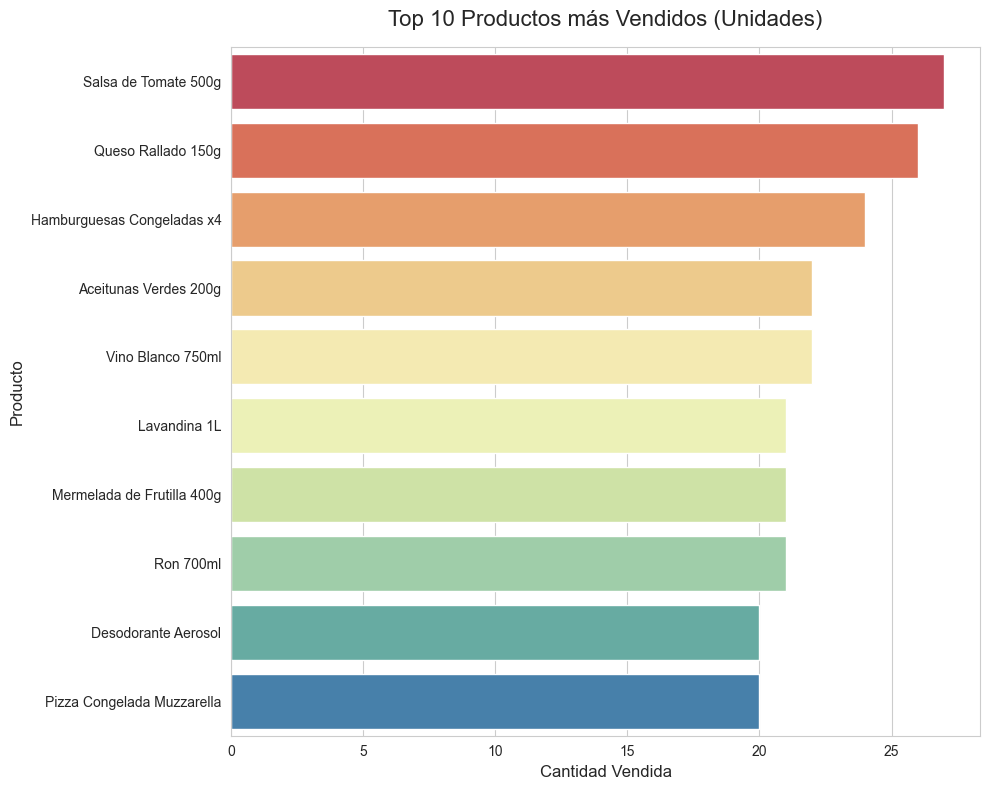

In [13]:
if not df_consolidado.empty:
    
    # Agrupación por Nombre de Producto y suma de la Cantidad vendida
    top_10_productos = df_consolidado.groupby('nombre_producto')['cantidad'].sum().nlargest(10)
    
    print("\n🏆 Top 10 Productos más Vendidos (por Unidades):")
    print(top_10_productos)

    # Visualización (Gráfico de barras horizontales)
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=top_10_productos.values, 
        y=top_10_productos.index, 
        palette='Spectral'
    )
    plt.title('Top 10 Productos más Vendidos (Unidades)', fontsize=16, pad=15)
    plt.xlabel('Cantidad Vendida', fontsize=12)
    plt.ylabel('Producto', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("No se puede generar la visualización del Top 10 Productos: DataFrame vacío.")

## 🎯 Conclusiones

Este análisis confirma la integridad y consistencia de los datos después de la fase ETL modularizada:

* **Validación:** La limpieza previa garantizó que el campo `importe` fuera confiable para los cálculos.
* **KPIs:** El **Ingreso Total** y el **Ticket Promedio** establecen la línea base del rendimiento de ventas.
* **Análisis Categórico:** El gráfico muestra claramente que **[Analiza el gráfico que obtuviste, e.g., "Alimentos domina claramente los ingresos, superando a Limpieza, lo que justifica enfocar las estrategias de marketing en esa área."]**

📌 **Próximos Pasos:** Este DataFrame consolidado está listo para análisis más complejos, como la Segmentación RFM de clientes o la previsión de ventas.